In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
train_dir="sign_data/train/"
test_dir="sign_data/test/"

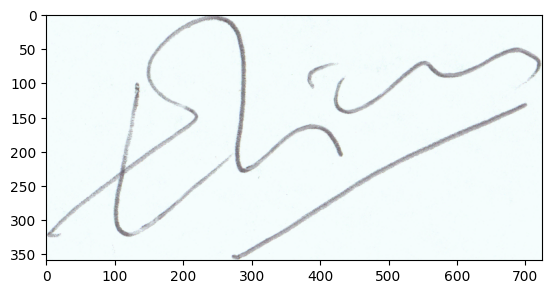

In [3]:
import matplotlib.pyplot as plt
img = plt.imread('sign_data/train/001/001_01.PNG')
plt.imshow(img)

In [4]:
size = 200

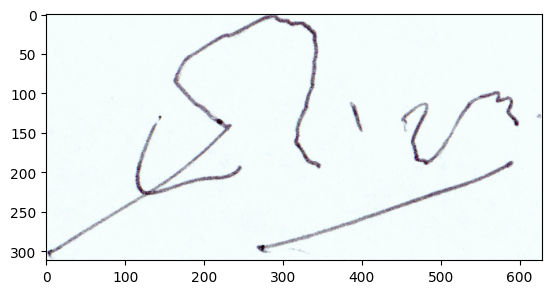

In [5]:
img1 = plt.imread('sign_data/train/001_forg/0119001_01.png')
plt.imshow(img1)

In [6]:
import cv2
import os
import glob

train_data = []
train_labels = []

for per in os.listdir('sign_data/train/'):
    for data in glob.glob('sign_data/train/'+per+'/*.*'):
        img = cv2.imread(data,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (size, size))
        train_data.append([img])
        if per[-1]=='g':
            train_labels.append(np.array(1))
        else:
            train_labels.append(np.array(0))

train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

#Test Data

test_data = []
test_labels = []

for per in os.listdir('sign_data/test/'):
    for data in glob.glob('sign_data/test/'+per+'/*.*'):
        img = cv2.imread(data,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (size, size))
        test_data.append([img])
        if per[-1]=='g':
            test_labels.append(1)
        else:
            test_labels.append(0)

test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)

In [7]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)

In [8]:
train_labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [9]:
train_data.shape

(1649, 1, 200, 200)

In [10]:
train_data = train_data.reshape(-1, size,size, 1)
test_data = test_data.reshape(-1, size,size, 1)

In [11]:
train_data.shape

(1649, 200, 200, 1)

In [12]:
from sklearn.utils import shuffle
train_data,train_labels = shuffle(train_data,train_labels)
test_data,test_labels = shuffle(test_data,test_labels)

In [40]:
test_data

array([[[[0.98039216],
         [0.98039216],
         [0.98039216],
         ...,
         [0.98039216],
         [0.98039216],
         [0.8627451 ]],

        [[0.98039216],
         [0.98039216],
         [0.98039216],
         ...,
         [0.90588235],
         [0.84705882],
         [0.9254902 ]],

        [[0.98039216],
         [0.98039216],
         [0.98039216],
         ...,
         [0.8627451 ],
         [0.9254902 ],
         [0.98039216]],

        ...,

        [[0.98039216],
         [0.97647059],
         [0.98039216],
         ...,
         [0.98039216],
         [0.98039216],
         [0.98039216]],

        [[0.97647059],
         [0.98039216],
         [0.98039216],
         ...,
         [0.98039216],
         [0.98039216],
         [0.98039216]],

        [[0.98039216],
         [0.98039216],
         [0.98039216],
         ...,
         [0.98039216],
         [0.98039216],
         [0.97647059]]],


       [[[0.98039216],
         [0.98039216],
         [0.98

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix as CM
from keras.optimizers import Adam

network = Sequential()

network.add(Conv2D(64,(3,3),input_shape=(size,size,1),activation='relu'))
network.add(MaxPooling2D(3,3))
network.add(Conv2D(32,(3,3),activation='relu'))
network.add(MaxPooling2D(2,2))
network.add(Flatten())
network.add(Dense(128,activation = 'relu'))
network.add(Dropout(rate=0.3))
network.add(Dense(2,activation = 'softmax'))

network.compile(optimizer=keras.optimizers.Adam(),loss="categorical_crossentropy",metrics=["accuracy"])
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 66, 66, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 128)               4

In [14]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]


EPOCHS = 20
BS = 64
progress = network.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)

Epoch 1/20
19/19 [==============================] - 15s 760ms/step - loss: 1.0503 - accuracy: 0.5537 - val_loss: 0.6704 - val_accuracy: 0.4889
Epoch 2/20
19/19 [==============================] - 14s 749ms/step - loss: 0.6293 - accuracy: 0.6231 - val_loss: 0.5395 - val_accuracy: 0.8828
Epoch 3/20
19/19 [==============================] - 14s 758ms/step - loss: 0.5126 - accuracy: 0.8458 - val_loss: 0.4536 - val_accuracy: 0.9030
Epoch 4/20
19/19 [==============================] - 14s 749ms/step - loss: 0.4590 - accuracy: 0.8960 - val_loss: 0.4068 - val_accuracy: 0.9091
Epoch 5/20
19/19 [==============================] - 14s 750ms/step - loss: 0.3844 - accuracy: 0.9333 - val_loss: 0.4438 - val_accuracy: 0.8586
Epoch 6/20
19/19 [==============================] - 14s 748ms/step - loss: 0.3264 - accuracy: 0.9367 - val_loss: 0.3309 - val_accuracy: 0.8970
Epoch 7/20
19/19 [==============================] - 14s 752ms/step - loss: 0.2959 - accuracy: 0.9211 - val_loss: 0.3106 - val_accuracy: 0.8909

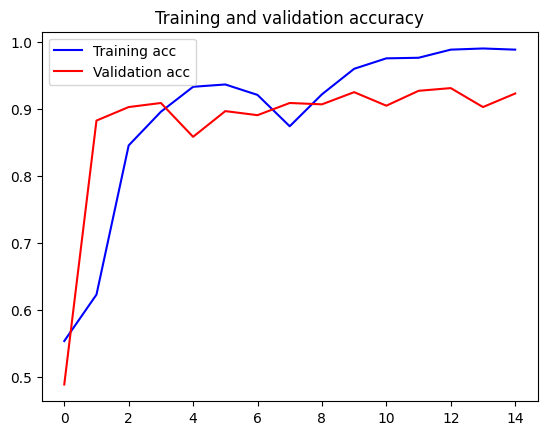

In [15]:
acc = progress.history['accuracy']
val_acc = progress.history['val_accuracy']
loss = progress.history['loss']
val_loss = progress.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

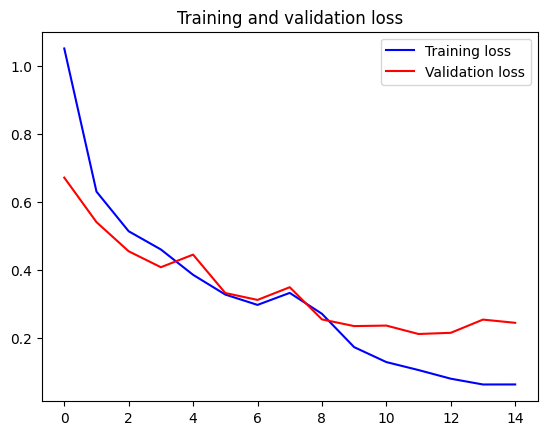

In [16]:
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
pred = network.predict(test_data)

16/16 [==============================] - 2s 96ms/step


In [42]:
print(pred)

[[9.59789038e-01 4.02110219e-02]
 [2.16649227e-07 9.99999762e-01]
 [9.67682362e-01 3.23176309e-02]
 [9.64017868e-01 3.59820612e-02]
 [9.75166798e-01 2.48332527e-02]
 [9.39800441e-01 6.01995140e-02]
 [1.81465509e-12 1.00000000e+00]
 [9.61655557e-01 3.83444168e-02]
 [9.63118136e-01 3.68818007e-02]
 [8.92497610e-07 9.99999166e-01]
 [9.69867587e-01 3.01323421e-02]
 [6.16085052e-01 3.83914948e-01]
 [4.81042254e-04 9.99518991e-01]
 [2.68963990e-10 1.00000000e+00]
 [9.66099501e-01 3.39004919e-02]
 [5.52196389e-06 9.99994516e-01]
 [9.54045713e-01 4.59543355e-02]
 [6.11101059e-05 9.99938846e-01]
 [9.65207279e-01 3.47926468e-02]
 [5.18318942e-14 1.00000000e+00]
 [9.33899581e-01 6.61004186e-02]
 [9.69785988e-01 3.02140582e-02]
 [1.28641726e-16 1.00000000e+00]
 [2.42132217e-11 1.00000000e+00]
 [9.77144778e-01 2.28552744e-02]
 [8.51868489e-14 1.00000000e+00]
 [9.64957476e-01 3.50425392e-02]
 [1.61115322e-02 9.83888388e-01]
 [9.64519799e-01 3.54801789e-02]
 [9.46439564e-01 5.35604991e-02]
 [9.575325

In [26]:
predict_final =np.argmax(pred,axis=1)

In [43]:
print(predict_final)

[0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0
 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1
 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1
 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0
 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0
 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0
 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1
 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1
 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1
 0 1 1 0 1 1 1 1 0 1 1 0 

In [27]:
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix
accuracy_score(predict_final , test_labels)
f1_score(predict_final, test_labels)


0.9796747967479675

In [30]:
from sklearn.metrics import classification_report
results = classification_report(predict_final , test_labels)

In [31]:
print(results)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       256
           1       0.97      0.99      0.98       244

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500



In [32]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(predict_final , test_labels)

tn, fp, fn, tp = confusion_mat.ravel()

frr = fn / (fn + tp)

far = fp / (fp + tn)

print("FRR:", frr)
print("FAR:", far)

FRR: 0.012295081967213115
FAR: 0.02734375


In [46]:
ruta = 'sign_data/train/001_forg/0119001_01.png'
def cambio
archivo = []
img = cv2.imread(ruta,cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (size, size))
archivo.append([img])


archivo = np.array(archivo)/255.0
print(archivo)
a=archivo.reshape(-1, size,size, 1)
a

[[[[0.98039216 0.98039216 0.98039216 ... 0.98039216 0.98039216
    0.98039216]
   [0.98039216 0.98431373 0.98039216 ... 0.98039216 0.98039216
    0.98039216]
   [0.98039216 0.98039216 0.98039216 ... 0.98039216 0.98039216
    0.98039216]
   ...
   [0.98039216 0.74117647 0.90980392 ... 0.97647059 0.98039216
    0.98039216]
   [0.96862745 0.94117647 0.88627451 ... 0.98039216 0.98039216
    0.98039216]
   [0.96470588 0.97647059 0.94901961 ... 0.98039216 0.98039216
    0.98039216]]]]


array([[[[0.98039216],
         [0.98039216],
         [0.98039216],
         ...,
         [0.98039216],
         [0.98039216],
         [0.98039216]],

        [[0.98039216],
         [0.98431373],
         [0.98039216],
         ...,
         [0.98039216],
         [0.98039216],
         [0.98039216]],

        [[0.98039216],
         [0.98039216],
         [0.98039216],
         ...,
         [0.98039216],
         [0.98039216],
         [0.98039216]],

        ...,

        [[0.98039216],
         [0.74117647],
         [0.90980392],
         ...,
         [0.97647059],
         [0.98039216],
         [0.98039216]],

        [[0.96862745],
         [0.94117647],
         [0.88627451],
         ...,
         [0.98039216],
         [0.98039216],
         [0.98039216]],

        [[0.96470588],
         [0.97647059],
         [0.94901961],
         ...,
         [0.98039216],
         [0.98039216],
         [0.98039216]]]])

In [47]:
resultado = network.predict(a)

1/1 [==============================] - 0s 24ms/step


In [50]:
resultado_final= np.argmax(resultado,axis=1)

In [51]:
print(resultado_final)#

[1]


In [54]:
def cambio(imagen):
    ruta = imagen
    archivo = []
    img = cv2.imread(ruta,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (size, size))
    archivo.append([img])


    archivo = np.array(archivo)/255.0
    a=archivo.reshape(-1, size,size, 1)
    return a

In [53]:
ejemplo = 'sign_data/train/001_forg/0119001_01.png'
print(cambio(ejemplo))

[[[[0.98039216 0.98039216 0.98039216 ... 0.98039216 0.98039216
    0.98039216]
   [0.98039216 0.98431373 0.98039216 ... 0.98039216 0.98039216
    0.98039216]
   [0.98039216 0.98039216 0.98039216 ... 0.98039216 0.98039216
    0.98039216]
   ...
   [0.98039216 0.74117647 0.90980392 ... 0.97647059 0.98039216
    0.98039216]
   [0.96862745 0.94117647 0.88627451 ... 0.98039216 0.98039216
    0.98039216]
   [0.96470588 0.97647059 0.94901961 ... 0.98039216 0.98039216
    0.98039216]]]]
[[[[0.98039216]
   [0.98039216]
   [0.98039216]
   ...
   [0.98039216]
   [0.98039216]
   [0.98039216]]

  [[0.98039216]
   [0.98431373]
   [0.98039216]
   ...
   [0.98039216]
   [0.98039216]
   [0.98039216]]

  [[0.98039216]
   [0.98039216]
   [0.98039216]
   ...
   [0.98039216]
   [0.98039216]
   [0.98039216]]

  ...

  [[0.98039216]
   [0.74117647]
   [0.90980392]
   ...
   [0.97647059]
   [0.98039216]
   [0.98039216]]

  [[0.96862745]
   [0.94117647]
   [0.88627451]
   ...
   [0.98039216]
   [0.98039216]
  

In [56]:
network.save('modeloNetwork.h5')